
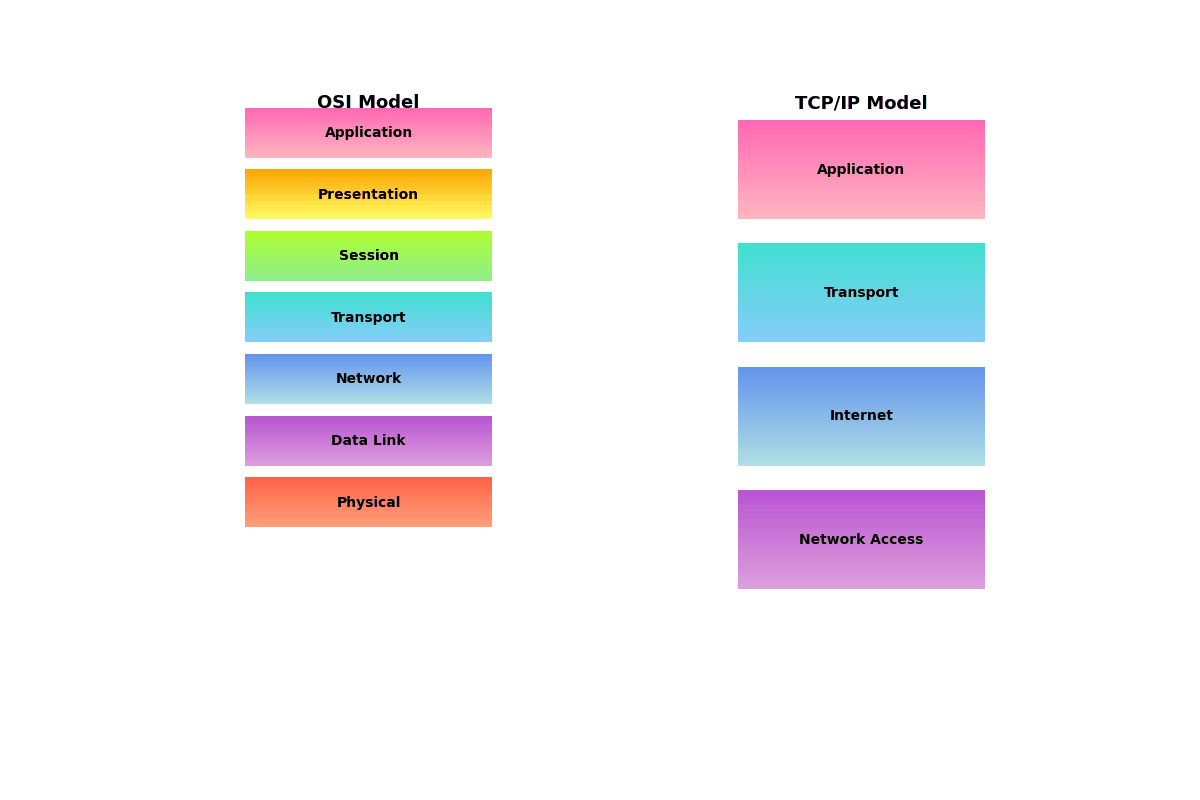

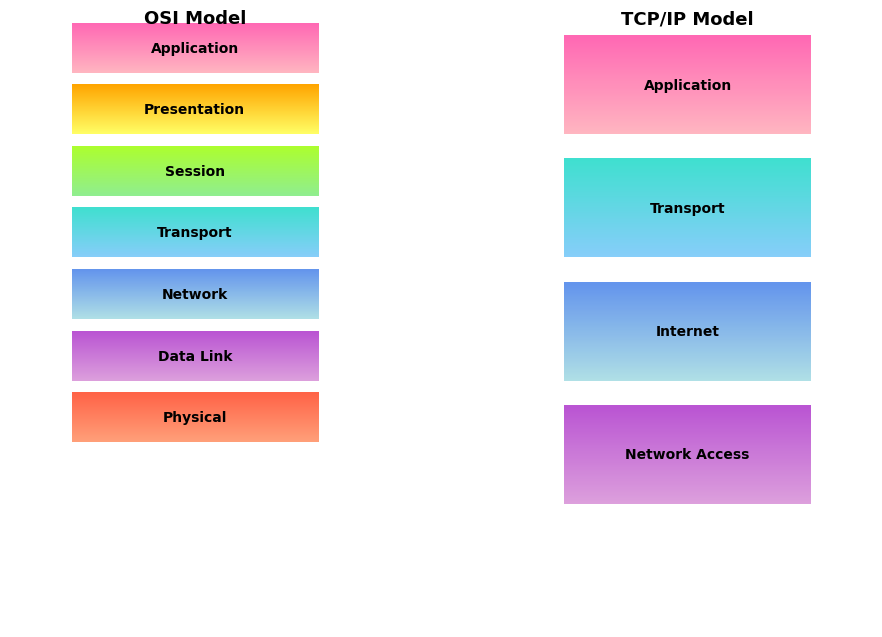

In [4]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.patches import FancyArrow
from IPython.display import HTML, display
import numpy as np
import base64



osi_layers = ["Application", "Presentation", "Session", "Transport", "Network", "Data Link", "Physical"]
tcpip_layers = ["Application", "Transport", "Internet", "Network Access"]
osi_to_tcpip = {
    "Application": "Application",
    "Presentation": "Application",
    "Session": "Application",
    "Transport": "Transport",
    "Network": "Internet",
    "Data Link": "Network Access",
    "Physical": "Network Access"
}

gradient_colors = {
    "Application": ((255, 105, 180), (255, 182, 193)),
    "Presentation": ((255, 165, 0), (255, 255, 102)),
    "Session": ((173, 255, 47), (144, 238, 144)),
    "Transport": ((64, 224, 208), (135, 206, 250)),
    "Network": ((100, 149, 237), (176, 224, 230)),
    "Data Link": ((186, 85, 211), (221, 160, 221)),
    "Physical": ((255, 99, 71), (255, 160, 122)),
    "Internet": ((100, 149, 237), (176, 224, 230)),
    "Network Access": ((186, 85, 211), (221, 160, 221))
}

tcpip_y_pos = {"Application": 8, "Transport": 6, "Internet": 4, "Network Access": 2}

def make_gradient(start_rgb, end_rgb, height=80, width=400):
    gradient = np.zeros((height, width, 3), dtype=np.uint8)
    for i in range(3):  # R, G, B
        gradient[:, :, i] = np.linspace(start_rgb[i], end_rgb[i], height).reshape(-1, 1)
    return gradient


fig, ax = plt.subplots(figsize=(12, 8))

def draw_background():
    ax.clear()
    ax.set_xlim(0, 14)
    ax.set_ylim(0, 10)
    ax.axis("off")


    for i, layer in enumerate(osi_layers):
        y = 9 - i
        img = make_gradient(*gradient_colors[layer])
        ax.imshow(img, extent=(1, 5, y, y + 0.8))
        ax.text(3, y + 0.4, layer, ha="center", va="center", fontsize=10, weight="bold")


    for layer, y in tcpip_y_pos.items():
        img = make_gradient(*gradient_colors[layer])
        ax.imshow(img, extent=(9, 13, y, y + 1.6))
        ax.text(11, y + 0.8, layer, ha="center", va="center", fontsize=10, weight="bold")

    ax.text(3, 9.8, "OSI Model", fontsize=13, weight="bold", ha="center")
    ax.text(11, 9.8, "TCP/IP Model", fontsize=13, weight="bold", ha="center")

def animate(frame):
    draw_background()
    total_frames = 10
    layer_index = frame // total_frames
    step = frame % total_frames

    if layer_index >= len(osi_layers):
        return

    osi_layer = osi_layers[layer_index]
    tcpip_layer = osi_to_tcpip[osi_layer]

    osi_y = 9 - layer_index + 0.4
    tcpip_y = tcpip_y_pos[tcpip_layer] + 0.8

    x_start, y_start = 5.2, osi_y
    x_end, y_end = 8.8, tcpip_y


    t = step / total_frames
    x_head = x_start + (x_end - x_start) * t
    y_head = y_start + (y_end - y_start) * t

    ax.add_patch(FancyArrow(
        x_start, y_start,
        x_head - x_start, y_head - y_start,
        width=0.05, head_width=0.3,
        color="black", length_includes_head=True
    ))


frames = len(osi_layers) * 10
ani = FuncAnimation(fig, animate, frames=frames, interval=100)


gif_path = "/tmp/osi_tcpip_smooth.gif"
ani.save(gif_path, writer=PillowWriter(fps=10))


with open(gif_path, "rb") as f:
    encoded = base64.b64encode(f.read()).decode("utf-8")

html_code = f"""
<div style="text-align:center; font-family:sans-serif; border: 2px solid #ccc; padding: 20px; margin: 20px; background-color:#f9f9f9;">
    <h2 style="color:#ff69b4;">OSI vs TCP/IP Model Visualization</h2>
    <p style="font-size:14px; color:#444;"> How the OSI model layers map to the TCP/IP model.</p>
    <img src="data:image/gif;base64,{encoded}" style="border-radius: 10px; border: 1px solid #aaa;" />
</div>
"""

display(HTML(html_code))